In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<p style="padding: 10px;
          color:#0000FF;
          font-weight: bold;
          text-align: center;
          font-size:260%;">
NFL Big Data Bowl 2022 EDA 
     </p>

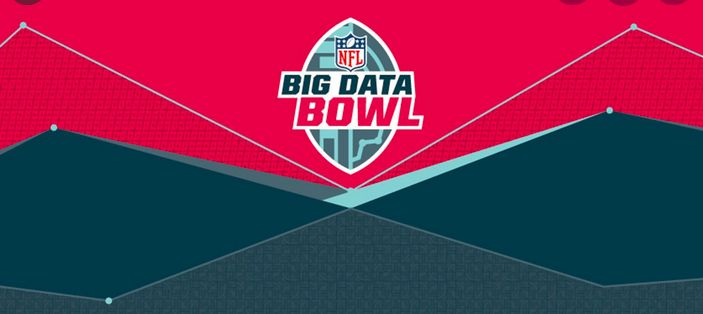

In [ ]:
import numpy as np
import pandas as pd
        
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

pd.set_option('display.max_columns', None)

<p style="padding: 10px;
          color:#0000FF;
          font-weight: bold;
          text-align: center;
          font-size:200%;">
Game Data 
     </p>

<p>  
    
    Game data: The games.csv contains match information. The key variable is gameId. 

    GameId: Game identifier, unique (numeric)
    
    season: Year of the match
    
    week: week of the season
    
    gameDate: Game Date (time, mm/dd/yyyy)

    gameTimeEastern: Start time of game (time, HH:MM:SS, EST)

    homeTeamAbbr: Home team three-letter code (text)

    visitorTeamAbbr: Visiting team three-letter code (text)
</p>

In [ ]:
games = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/games.csv')
games.head()

In [ ]:
check = games['gameDate'].value_counts().reset_index()

check.columns = [
    'date', 
    'games'
]
check = check.sort_values('games')

fig = px.bar(
    check, 
    y='date', 
    x="games", 
    orientation='h', 
    title='Number of games for every date', 
    height=800, 
    width=800
)
fig.show()



check = games['homeTeamAbbr'].value_counts().reset_index()

check.columns = [
    'team', 
    'games'
]

check = check.sort_values('games')

fig = px.bar(
    check, 
    y='team', 
    x="games", 
    orientation='h', 
    title='Number of games for every team (home)', 
    height=900, 
    width=800
)

fig.show()



In [ ]:
check = games['gameTimeEastern'].value_counts().reset_index()

check.columns = [
    'time', 
    'games'
]

check = check.sort_values('games')

fig = px.bar(
    check, 
    y='time', 
    x="games", 
    orientation='h', 
    title='Number of games for every time', 
    height=900, 
    width=800
)

fig.show()

In [ ]:
visitor = games['visitorTeamAbbr'].value_counts().reset_index()

visitor.columns = [
    'team', 
    'games'
]

visitor = visitor.sort_values('games')

fig = px.bar(
    visitor, 
    y='team', 
    x="games", 
    orientation='h', 
    title='Number of games for every team (away)', 
    height=700, 
    width=800
)

fig.show()

In [ ]:
check = games['week'].value_counts().reset_index()

check.columns = [
    'week', 
    'games'
]

check = check.sort_values('games')
check['week'] = check['week'].astype(str) + '-'

fig = px.bar(
    check, 
    y='week', 
    x="games", 
    orientation='h', 
    title='Number of games for every week', 
    height=900, 
    width=800
)

fig.show()

<p style="padding: 10px;
          color:#0000FF;
          font-weight: bold;
          text-align: center;
          font-size:200%;">
Player Data
     </p>


    Player data: The players.csv file contains player-level information. The key variable is nflId. There are 7 columns.

    nflId: Player identification number

    height: Player height 

    weight: Player weight 

    birthDate: Date of birth (YYYY-MM-DD)

    collegeName: Player college 

    position: Player position 

    displayName: Player name 



In [ ]:
players = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/players.csv')
players.head()

Since, height column values are in feet as well as in cm. Converting all height values to feet.

In [ ]:
check = players['height'].str.split('-',expand=True)

check.columns = [
    'first', 
    'second'
]

check.loc[(check['second'].notnull()), 'first'] = check[check['second'].notnull()]['first'].astype(np.int16) * 12 + check[check['second'].notnull()]['second'].astype(np.int16)
players['height'] = check['first']
players['height'] = players['height'].astype(np.float32)
players['height'] /= 12

players.head()

In [ ]:
fig = make_subplots(rows=1, cols=2)
traces = [
    go.Histogram(
        x=players[col[0]], 
        nbinsx=col[1], 
        name=col[0]
    ) for col in [('height', 20), ('weight', 50)]
]

for i in range(len(traces)):
    fig.append_trace(
        traces[i], 
        (i // 2) + 1, 
        (i % 2) + 1
    )

fig.update_layout(
    title_text='Height & weight distributions',
    height=400,
    width=800
)

fig.show()



In [ ]:
check = players['collegeName'].value_counts().reset_index()

check.columns = [
    'college', 
    'players'
]

check = check.sort_values('players').tail(50)

fig = px.bar(
    check, 
    y='college', 
    x="players", 
    orientation='h', 
    title='Top 50 colleges by number of players',
    height=900,
    width=800
)

fig.show()

In [ ]:
check = players['Position'].value_counts().reset_index()

check.columns = [
    'position', 
    'players'
]

check = check.sort_values('players')

fig = px.bar(
    check, 
    y='position', 
    x="players", 
    orientation='h', 
    title='Top positions by number of players',
    height=600,
    width=800
)

fig.show()

<p style="padding: 10px;
          color:#0000FF;
          font-weight: bold;
          text-align: center;
          font-size:200%;">
Play Data 
     </p>

In [ ]:
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/plays.csv')
plays.head()

In [ ]:
check = plays['quarter'].value_counts().reset_index()

check.columns = [
    'quarter', 
    'plays'
]

check = check.sort_values('plays')

fig = px.pie(
    check, 
    names='quarter', 
    values="plays",  
    title='Number of plays of every quarter',
    height=500,
    width=800
)

fig.show()

In [ ]:
check = plays['down'].value_counts().reset_index()

check.columns = [
    'down', 
    'plays'
]

check = check.sort_values('plays')
fig = px.pie(
    check, 
    names='down', 
    values="plays",  
    title='Number of plays of every down',
    height=500,
    width=800
)

fig.show()

In [ ]:
check = plays['yardsToGo'].value_counts().reset_index()

check.columns = [
    'yardsToGo', 
    'plays'
]

check['yardsToGo'] = check['yardsToGo'].astype(str) + '-'
check = check.sort_values('plays')

fig = px.bar(
    check, 
    y='yardsToGo', 
    x="plays", 
    orientation='h', 
    title='Number of plays for every yards to go category',
    height=800,
    width=800
)

fig.show()

In [ ]:
check = plays['possessionTeam'].value_counts().reset_index()

check.columns = [
    'team', 
    'plays'
]

check = check.sort_values('plays')

fig = px.bar(
    check, 
    y='team', 
    x="plays", 
    orientation='h', 
    title='Number of plays for every team',
    height=800,
    width=800
)
fig.show()


In [ ]:
check = plays['specialTeamsPlayType'].value_counts().reset_index()

check.columns = [
    'type', 
    'plays'
]

check = check.sort_values('plays')

fig = px.pie(
    check, 
    names='type', 
    values="plays",  
    title='Number of plays of every type',
    height=500,
    width=800
)

fig.show()

In [ ]:
check = plays['yardlineSide'].value_counts().reset_index()

check.columns = [
    'yardlineSide', 
    'plays'
]

check = check.sort_values('plays')

fig = px.bar(
    check, 
    y='yardlineSide', 
    x="plays", 
    orientation='h', 
    title='Number of plays for every team yard side',
    height=800,
    width=800
)

fig.show()

In [ ]:
check = plays['yardlineNumber'].value_counts().reset_index()

check.columns = [
    'yardline', 
    'plays'
]

check = check.sort_values('plays')

fig = px.bar(
    check, 
    x='yardline', 
    y="plays",  
    title='Number of plays for every yardline',
    height=500,
    width=800
)

fig.show()

In [ ]:
check = plays['possessionTeam'].value_counts().reset_index()

check.columns = [
    'personnelO', 
    'plays'
]

check = check.sort_values('plays')

fig = px.bar(
    check, 
    y='personnelO', 
    x="plays", 
    orientation='h', 
    title='Number of plays for every possessionTeam',
    height=1000,
    width=800
)

fig.show()

<p style="padding: 10px;
          color:#0000FF;
          font-weight: bold;
          text-align: center;
          font-size:200%;">
Tracking Data 2018
     </p>

In [ ]:
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv')
plays=plays.head(10000)


In [ ]:
fig = px.histogram(plays,x="x", width=400, height=400,nbins=50, title='X coordinate distribution')
fig.show()

fig = px.histogram( plays,  x="y",width=400,height=400,nbins=50,title='Y coordinate distribution')
fig.show()

fig = px.histogram( plays, x="s", width=400, height=400, nbins=50,title='Speed distribution')
fig.show()

fig = px.histogram(plays,  x="a", width=400, height=400,nbins=50,title='Acceleration distribution')
fig.show()

fig = px.histogram(plays,x="dis",width=400, height=400,nbins=50,title='Distance distribution (yards)')
fig.show()

fig = px.histogram(plays,x="o",width=400, height=400,nbins=50,title='Player orientation distribution')
fig.show()

fig = px.histogram(plays,x="dir",width=400,height=400,nbins=50,title='Angle of player motion distribution')
fig.show()

<p style="padding: 10px;
          color:#0000FF;
          font-weight: bold;
          text-align: center;
          font-size:200%;">
Tracking Data 2019
     </p>

In [ ]:
plays19 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2019.csv')
plays19=plays19.head(10000)

In [ ]:
fig = px.histogram(plays19,x="x", width=400, height=400,nbins=50, title='X coordinate distribution')
fig.show()

fig = px.histogram( plays19,  x="y",width=400,height=400,nbins=50,title='Y coordinate distribution')
fig.show()

fig = px.histogram( plays19, x="s", width=400, height=400, nbins=50,title='Speed distribution')
fig.show()

fig = px.histogram(plays19,  x="a", width=400, height=400,nbins=50,title='Acceleration distribution')
fig.show()

fig = px.histogram(plays19,x="dis",width=400, height=400,nbins=50,title='Distance distribution (yards)')
fig.show()

fig = px.histogram(plays19,x="o",width=400, height=400,nbins=50,title='Player orientation distribution')
fig.show()

fig = px.histogram(plays19,x="dir",width=400,height=400,nbins=50,title='Angle of player motion distribution')
fig.show()

<p style="padding: 10px;
          color:#0000FF;
          font-weight: bold;
          text-align: center;
          font-size:200%;">
Tracking Data 2020
     </p>

In [ ]:
plays20 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2020.csv')
plays20=plays20.head(10000)

In [ ]:
fig = px.histogram(plays20,x="x", width=400, height=400,nbins=50, title='X coordinate distribution')
fig.show()

fig = px.histogram( plays20,  x="y",width=400,height=400,nbins=50,title='Y coordinate distribution')
fig.show()

fig = px.histogram( plays20, x="s", width=400, height=400, nbins=50,title='Speed distribution')
fig.show()

fig = px.histogram(plays20,  x="a", width=400, height=400,nbins=50,title='Acceleration distribution')
fig.show()

fig = px.histogram(plays20,x="dis",width=400, height=400,nbins=50,title='Distance distribution (yards)')
fig.show()

fig = px.histogram(plays20,x="o",width=400, height=400,nbins=50,title='Player orientation distribution')
fig.show()

fig = px.histogram(plays20,x="dir",width=400,height=400,nbins=50,title='Angle of player motion distribution')
fig.show()

<p style="padding: 10px;
          color:#0000FF;
          font-weight: bold;
          text-align: center;
          font-size:200%;">
PFFScouting Data
     </p>

In [ ]:
pff = pd.read_csv(r'../input/nfl-big-data-bowl-2022/PFFScoutingData.csv')
pff.head()

In [ ]:
pff.info()

In [ ]:
check = pff['kickType'].value_counts().reset_index()
check.columns = ['type', 'plays']
check = check.sort_values('plays')
fig = px.pie(check,names='type',values="plays",title='kick Type',height=500, width=800)
fig.show()

check = pff['kickDirectionIntended'].value_counts().reset_index()
check.columns = ['type', 'plays']
check = check.sort_values('plays')
fig = px.pie(check,names='type',values="plays",title='kick Direction Intended',height=500, width=800)
fig.show()
                 
check = pff['kickDirectionActual'].value_counts().reset_index()
check.columns = ['type', 'plays']
check = check.sort_values('plays')
fig = px.pie(check,names='type',values="plays",title='kick Direction Actual',height=500, width=800)
fig.show()


check = pff['returnDirectionIntended'].value_counts().reset_index()
check.columns = ['type', 'plays']
check = check.sort_values('plays')
fig = px.pie(check,names='type',values="plays",title='return Direction Intended',height=500, width=800)
fig.show()

In [ ]:
#Thanks 